In [ ]:
#Hello World!

In [7]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [13]:
#This is the directory of the csv files
path = "har70plus"
files = os.listdir(path)

#Merging csv files based on this tutorial: https://www.raredogmarketing.com/resources/combining-multiple-csv-files-into-one-file-using-python-step-by-step-guide
csv_files = [f for f in files if f.endswith('.csv')]
df_list = []

for csv in csv_files:
    filepath = os.path.join(path, csv)
    df = pd.read_csv(filepath)
    df_list.append(df)
    
# Concatenate all data into one DataFrame
big_df = pd.concat(df_list, ignore_index=True)
# Save the final result to a new CSV file
big_df.to_csv(os.path.join(path, 'combined_file.csv'), index=False)

#df_append.to_csv(r"C:\Users\Eoin McDonnell\Documents\Ulster University Folder\COM774\COM774_CW2_CODE\har70plus\Combined_Files.csv")




In [9]:
#Pick out the columns we want to use as inputs
current_df = pd.read_csv("har70plus\combined_file.csv")

X = current_df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
Y = current_df['label'].values
## Now lets take a look at how many rows we have
len(X)

# And how many different types in each class, we should have 50 of each
print(np.unique(Y, return_counts=True))

#Split the data and keep 20% back for testing later
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
print("Train length", len(X_train))
print("Test length", len(X_test))

(array([1, 3, 4, 5, 6, 7, 8]), array([1079312,   66058,    4560,    4978,  418055,  483452,  203182]))
Train length 1807677
Test length 451920


In [10]:
model = LogisticRegression(C=1/0.1, solver="liblinear").fit(X_train, Y_train)

In [11]:
testPredictions = model.predict(X_test)
acc = np.average(testPredictions == Y_test)
print("Accuracy", acc)

Accuracy 0.7611435652327846


In [12]:
Y_scores = model.predict_proba(X_test)

TypeError: can only concatenate str (not "numpy.int64") to str

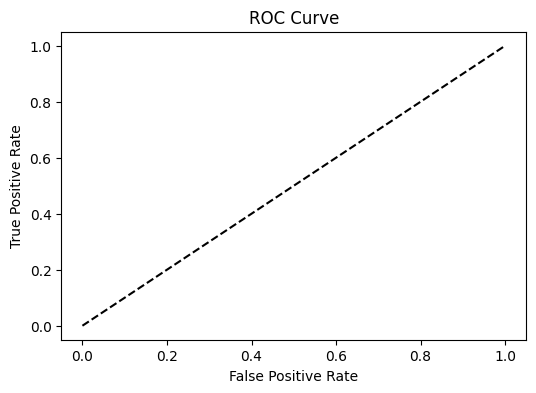

In [ ]:
#Create a figure
fig = plt.figure(figsize=(6, 4))
#Set labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#Plot the 50% line
plt.plot([0, 1], [0, 1], 'k--')
# plot ROC curve for the different classes
for idx, className in enumerate(current_df['label'].unique()):
	fpr, tpr, thresholds = roc_curve(Y_test == className, Y_scores[:,idx])
	seriesName = "ROC for " + str(className)
	# Plot the FPR and TPR achieved by our model
	plt.plot(fpr, tpr, label=seriesName)
#Add a legend
plt.legend()

#Compute the AUC
auc = roc_auc_score(Y_test,Y_scores, multi_class='ovr')
print('AUC', auc)